In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from sklearn import preprocessing
import cv2
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import io
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


### Visualize Data and Data Quality


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

# Upload the file to Colab
uploaded = files.upload()

Saving XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv to XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv


In [106]:
import io

data = pd.read_csv(io.BytesIO(uploaded['XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv']))

#### For a non-colab notebook like jupyter, just uncomment and run the code below. Make sure the data is in your working directory.

In [ ]:
# data = pd.read_csv('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

In [107]:
data.head(5)

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [11]:
data['Order'].unique()

array(['Fried Catfish Basket', 'Sugar Cream Pie', 'Indiana Pork Chili',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Indiana Buffalo Chicken Tacos (3 tacos)', 'Sweet Potato Fries',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Breaded Pork Tenderloin Sandwich', 'Cornbread Hush Puppies',
       'Hoosier BBQ Pulled Pork Sandwich'], dtype=object)

In [12]:
data.isnull().sum()

Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64

In [31]:
type(data['Year'][0]), type(data['Major'][0]), type(data['University'][0]), type(data['Time'][0])

(str, str, str, numpy.int64)

In [17]:
data['Year'].unique()

array(['Year 2', 'Year 3', 'Year 1', 'Year 4'], dtype=object)

In [18]:
data['Major'].unique()

array(['Physics', 'Chemistry', 'Biology', 'Business Administration',
       'Anthropology', 'Mathematics', 'Economics', 'Astronomy',
       'Marketing', 'Political Science', 'Finance', 'Sociology',
       'Accounting', 'Psychology', 'International Business', 'Music',
       'Mechanical Engineering', 'Philosophy', 'Fine Arts',
       'Civil Engineering'], dtype=object)

In [19]:
data['University'].unique()

array(['Indiana State University', 'Ball State University',
       'Butler University',
       'Indiana University-Purdue University Indianapolis (IUPUI)',
       'University of Notre Dame', 'University of Evansville',
       'Valparaiso University', 'Purdue University',
       'Indiana University Bloomington', 'DePauw University'],
      dtype=object)

In [20]:
data['Time'].unique()

array([12, 14, 11, 15, 13, 17,  9, 10, 16,  8])

In [79]:
df_encoded = pd.get_dummies(data, columns=['Major', 'University'])
df_encoded.head(3)

,Year,Time,Order,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
0,2,12,Fried Catfish Basket,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,14,Sugar Cream Pie,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,12,Indiana Pork Chili,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [80]:
label_enc = LabelEncoder()
df_encoded['Order'] = label_enc.fit_transform(df_encoded['Order'])
df_encoded.head(3)

,Year,Time,Order,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
0,2,12,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,14,7,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,12,6,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [81]:
X = df_encoded.drop('Order', axis=1)
Y = df_encoded['Order']

# _(25%)  Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data._

#### Above I checked for null values and the data types of the data that we're given just to make sure nothing was input erroneously. Furthermore, I looked at the unique types of school years, university names, and order names to make sure nothing was out of ordinary (i.e. a school year of 0 or 25). Below, is a general correlation table of all of the variables to see if there is any type of relationship or colinearity right off the bat. Categorical variables like University or Major were one-hot-encoded.

In [39]:
df_encoded.corr()

,Year,Time,Order,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
Year,1.000000,-0.015790,-0.114357,0.047852,-0.003375,0.048778,-0.047260,0.010074,-0.018105,0.022290,...,-0.114451,0.029854,0.041082,0.099749,-0.036922,0.018591,-0.015349,-0.013865,-0.072372,-0.027260
Time,-0.015790,1.000000,0.368199,-0.044945,-0.003604,0.039845,-0.000623,-0.016775,0.068795,-0.027592,...,-0.005755,-0.142009,0.004917,0.015282,0.074280,0.075046,0.015339,0.036665,0.155040,0.007810
Order,-0.114357,0.368199,1.000000,-0.072615,0.012056,0.004940,0.036111,-0.044732,0.018591,0.001198,...,0.104931,0.042671,-0.002585,-0.092577,0.070581,-0.123480,0.021991,-0.025528,0.119382,0.010275
Major_Accounting,0.047852,-0.044945,-0.072615,1.000000,-0.019433,-0.042119,-0.042738,-0.029979,-0.042931,-0.002746,...,-0.058989,0.019275,-0.001585,0.003159,-0.005496,0.039721,-0.001585,0.002459,-0.008489,0.037878
Major_Anthropology,-0.003375,-0.003604,0.012056,-0.019433,1.000000,-0.065191,-0.066149,-0.046401,-0.066447,-0.004249,...,-0.048074,-0.013031,-0.002453,0.034525,-0.008507,0.031446,-0.002453,0.013002,-0.008557,-0.007365
Major_Astronomy,0.048778,0.039845,0.004940,-0.042119,-0.065191,1.000000,-0.143368,-0.100568,-0.144014,-0.009210,...,0.000997,0.089860,-0.005316,-0.081573,-0.018437,-0.006072,-0.005316,0.004724,-0.024789,-0.001636
Major_Biology,-0.047260,-0.000623,0.036111,-0.042738,-0.066149,-0.143368,1.000000,-0.102046,-0.146131,-0.009345,...,0.007585,-0.028235,-0.005395,0.066617,-0.006432,-0.029076,-0.005395,-0.036616,-0.011809,-0.016197
Major_Business Administration,0.010074,-0.016775,-0.044732,-0.029979,-0.046401,-0.100568,-0.102046,1.000000,-0.102506,-0.006556,...,0.004901,0.007170,-0.003784,-0.062757,-0.013123,0.005700,-0.003784,-0.012267,0.135934,0.007536
Major_Chemistry,-0.018105,0.068795,0.018591,-0.042931,-0.066447,-0.144014,-0.146131,-0.102506,1.000000,-0.009388,...,0.040839,-0.040450,-0.005419,0.033292,-0.018792,-0.007493,-0.005419,-0.022641,-0.033761,0.011976
Major_Civil Engineering,0.022290,-0.027592,0.001198,-0.002746,-0.004249,-0.009210,-0.009345,-0.006556,-0.009388,1.000000,...,-0.012899,0.000552,-0.000347,0.003987,-0.001202,0.014059,-0.000347,-0.004204,-0.004219,-0.001040


#### After glancing at this above correlation table, we see that no variables have significant correlation with the "Order" variable thus far. However, the "Time" variable in the data has the highest correlation with the predictor variable with a correlation coefficient of $0.36842$, which will be useful in creating our predictive model.

In [47]:
temp_dat = data[['Time', 'Order']]
order_by_time = temp_dat.pivot_table(index='Time', columns='Order', aggfunc=len, fill_value=0)
order_by_time

Order,Breaded Pork Tenderloin Sandwich,Cornbread Hush Puppies,Fried Catfish Basket,Hoosier BBQ Pulled Pork Sandwich,Indiana Buffalo Chicken Tacos (3 tacos),Indiana Corn on the Cob (brushed with garlic butter),Indiana Pork Chili,Sugar Cream Pie,Sweet Potato Fries,Ultimate Grilled Cheese Sandwich (with bacon and tomato)
Time,,,,,,,,,,
8,6,1,1,0,0,0,0,0,0,0
9,17,10,11,0,0,1,1,0,0,0
10,69,54,48,0,1,14,50,5,6,0
11,121,153,139,1,1,188,168,33,38,15
12,149,180,206,14,66,249,203,88,87,72
13,91,91,62,260,204,42,81,150,152,183
14,31,18,20,201,182,1,7,136,125,162
15,10,3,3,6,42,0,0,80,72,66
16,0,0,0,0,0,0,0,18,26,5


#### From the above pivot table we see that certain foods are more popular at different times which is useful information. For example, we see that the fried catfish, cornbread hushpuppies, and corn on the cob are most popular between 11 and 12 and tend to decline in popularity later in the day. We also see that foods toward the right end of the pivot table are more popular later in the day.

In [49]:
temp_dat2 = data[['Major', 'Order']]
order_by_major = temp_dat2.pivot_table(index='Major', columns='Order', aggfunc=len, fill_value=0)
order_by_major

Order,Breaded Pork Tenderloin Sandwich,Cornbread Hush Puppies,Fried Catfish Basket,Hoosier BBQ Pulled Pork Sandwich,Indiana Buffalo Chicken Tacos (3 tacos),Indiana Corn on the Cob (brushed with garlic butter),Indiana Pork Chili,Sugar Cream Pie,Sweet Potato Fries,Ultimate Grilled Cheese Sandwich (with bacon and tomato)
Major,,,,,,,,,,
Accounting,14,14,1,0,16,17,0,0,0,0
Anthropology,0,3,36,37,3,1,8,25,33,0
Astronomy,84,74,33,31,91,94,12,42,30,128
Biology,21,40,80,101,28,27,160,89,87,2
Business Administration,61,66,5,5,55,56,1,3,5,77
Chemistry,45,48,65,87,48,50,107,76,95,19
Civil Engineering,0,0,0,0,1,2,0,0,0,0
Economics,18,11,71,89,8,20,131,88,73,2
Finance,24,33,0,0,44,31,0,0,0,3


#### From the above pivot table, we see that certain orders are more popular within different majors. For instance, the marketing majors seem to favor cornbread, chicken tacos, corn on the cob and grilled cheese sandwiches. Another interesting behviour is that physics majors seem to have a roughly even distribution of preferences across all order options. There also seems to be very little to no data for the fine arts majors or mechanical engineering majors.

#### Furthermore, there seems to be a strong bias towards data availbility. There seems to be much more data for STEM (Science, Technology, Engineering and Math) majors. There also seems to be very little data recorded among liberal arts and humanities majors so it might be challenging to try and guess accurately for the latter group. Below, I have plotted the conditional distirbutions of orders given that someone is a biology major and given someone is a physics major, respectively. We see that depending on someone's major, that has a degree of influence of what they choose to order.

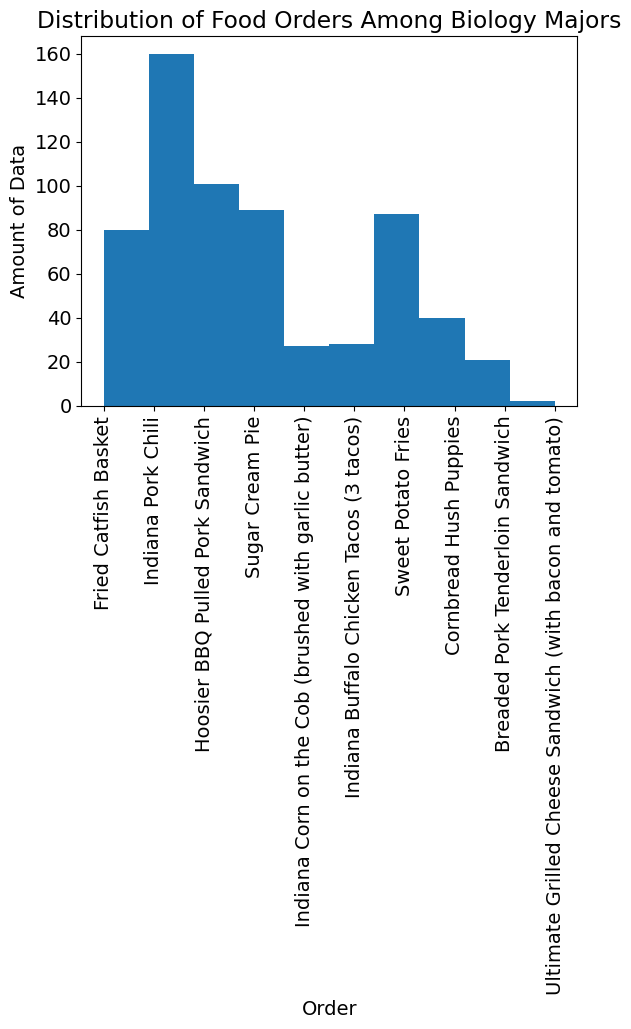

In [76]:
cond_dat1 = data[data['Major'] == 'Biology']
plt.hist(cond_dat1['Order'])
plt.title('Distribution of Food Orders Among Biology Majors')
plt.xlabel('Order')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)
plt.show()

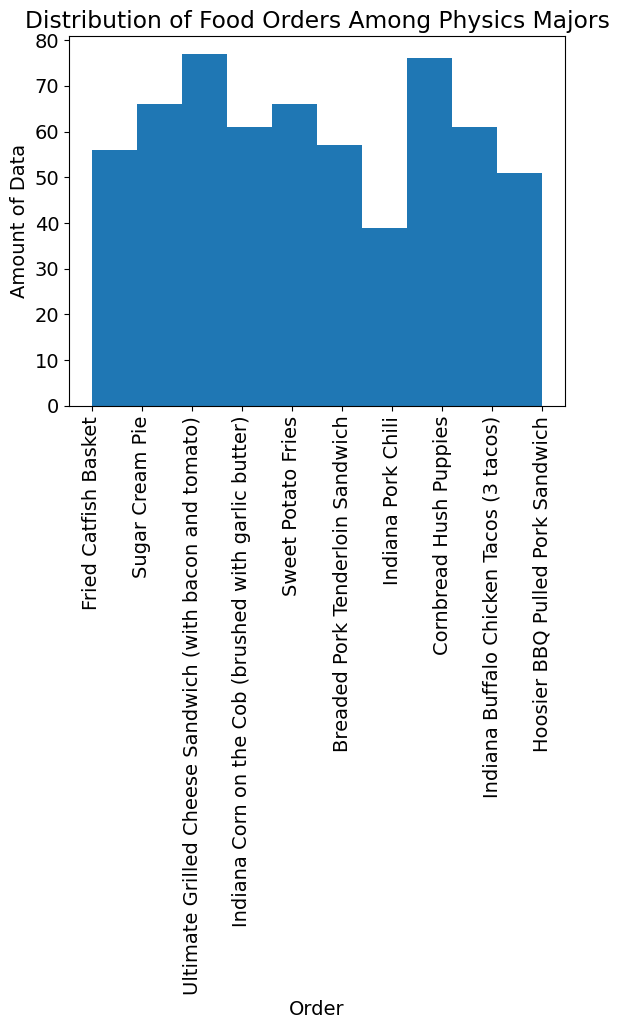

In [77]:
cond_dat1 = data[data['Major'] == 'Physics']
plt.hist(cond_dat1['Order'])
plt.title('Distribution of Food Orders Among Physics Majors')
plt.xlabel('Order')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)
plt.show()

In [51]:
temp_dat3 = data[['Year', 'Order']]
order_by_year = temp_dat3.pivot_table(index='Year', columns='Order', aggfunc=len, fill_value=0)
order_by_year

Order,Breaded Pork Tenderloin Sandwich,Cornbread Hush Puppies,Fried Catfish Basket,Hoosier BBQ Pulled Pork Sandwich,Indiana Buffalo Chicken Tacos (3 tacos),Indiana Corn on the Cob (brushed with garlic butter),Indiana Pork Chili,Sugar Cream Pie,Sweet Potato Fries,Ultimate Grilled Cheese Sandwich (with bacon and tomato)
Year,,,,,,,,,,
1,1,0,0,0,0,0,0,0,2,2
2,364,54,396,71,105,38,428,55,392,370
3,129,456,94,411,388,457,82,457,114,131
4,0,0,0,0,3,0,0,0,0,0


#### What is immediately noticed from the above pivot table is the problem that very little data exists for 1st and 4th year students. Most of the data is coming from sophomore and junior college students. Thus, there is a higher bias in the data towards sophomores and juniors.

#### Here below I examine the distributions of data that exists among different features in the data.

Text(0, 0.5, 'Amount of Data')

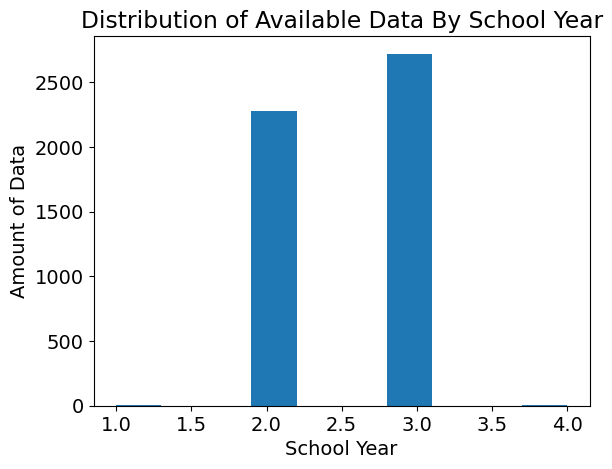

In [63]:
plt.hist(data['Year'])
plt.title('Distribution of Available Data By School Year')
plt.xlabel('School Year')
plt.ylabel('Amount of Data')


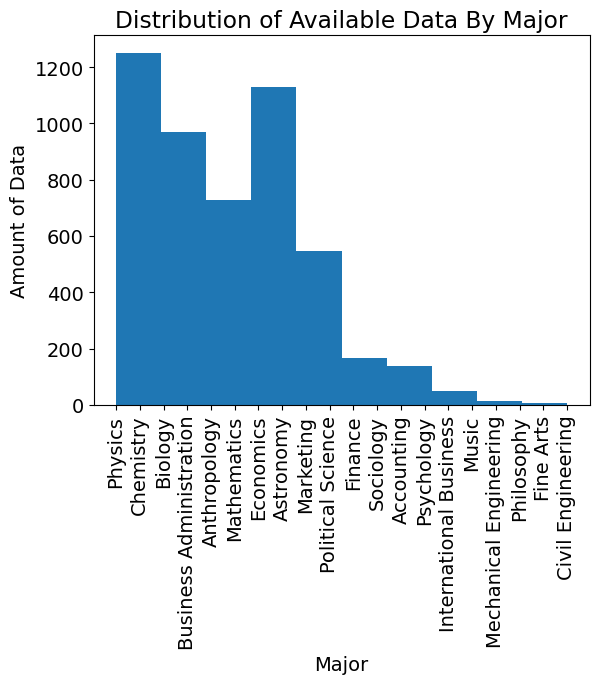

In [66]:
plt.hist(data['Major'])
plt.title('Distribution of Available Data By Major')
plt.xlabel('Major')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)
plt.show()

#### From the above data we see that there is much more data available for STEM majors overall. It is important to ask whether these metrics are proportional to the enrollement size of each major or if there exist eating patterns among particular majors. We see here that Physics and Astronomy majors are more likely to buy food at the food trucks. This could be potentially culture of eating in these majors or proximity of food vendors to the physics and astronomy departments on campus.

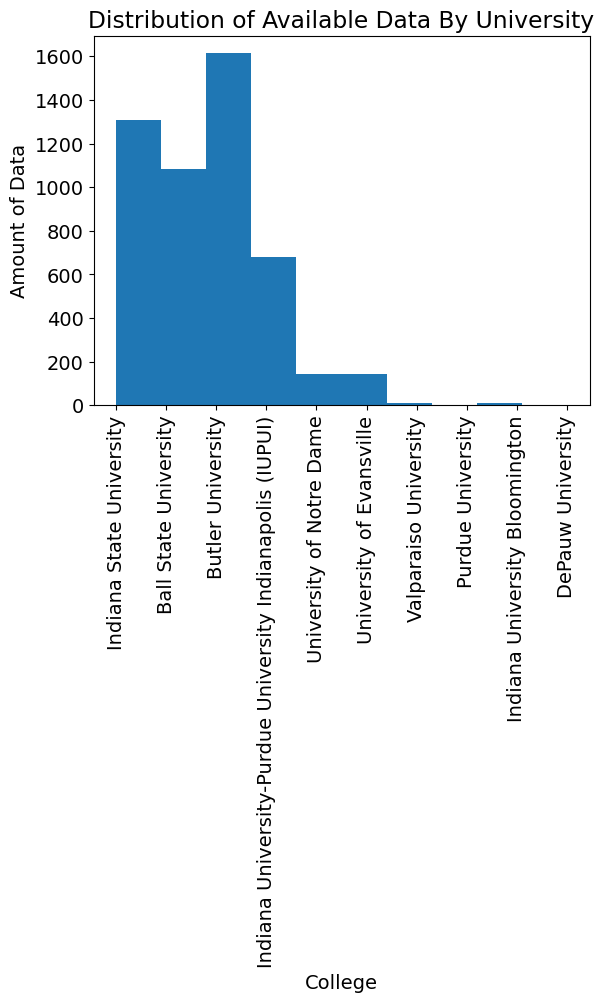

In [67]:
plt.hist(data['University'])
plt.title('Distribution of Available Data By University')
plt.xlabel('College')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)
plt.show()

#### Here we see that Indiana State, Ball State and Butler State Universities have the most data in regards to students who go out to eat at food vendors.

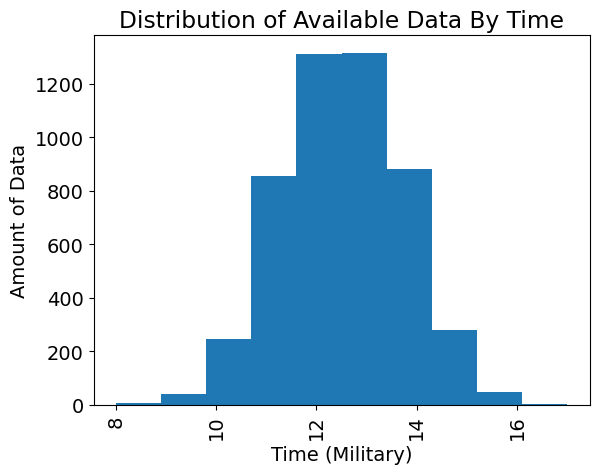

In [69]:
plt.hist(data['Time'])
plt.title('Distribution of Available Data By Time')
plt.xlabel('Time (Military)')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)
plt.show()

#### Interestingly enough, the times at which people go to buy food are normally distributed with a mean of approximately 12:45 PM which makes sense considering lunchtime is a very popular time for college students to buy food from a vendor. That being said, students are most likely to go out to buy food between 12PM and 1PM with the majority of those students being STEM majors.

#### In terms of impactful business use for the data, these food vendors seem to be ineffective at reaching 1st and 4th year college students as well as humanities and liberal arts majors. If possible, it would be beneficial to find a way to reach out more to these audiences to find what can be improved to attract more from these demographics. Perhaps a survey of what these people would like to see on a menu, affordability, dietary limitations, etc.

# _(30%) Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications._

#### _1) Discuss Ethical implications of these factors_
#### I believe that there are some important ethical implications that should be addressed. One important implication is that depending on the ethnicity or group to which an individual student belongs and their purchase data for food, it is important to not train a model that could reinforce dietary or consumption stereotypes among a particular group of people. Additionally, another problem that could arise is training a model that reinforces eating or dietary habits among a certain groups of varying socio-economic status. Another important follow up caveat to analyzing this data is that some people are not comfortable with having data collected regarding intimate details of their lifestyle, dietary habits, fitness or health. Collecting data regarding people's eating and spending habits should be approached with neutrality and transparency to establish trust with clients.

#### _2) Discuss Business outcome implications of these factors_
#### Potential business outcome implications of collecting this kind of data is that depending on who tends to buy certain types of food, businesses can put up locations towards departments where corresponding majors tend to spend more on eating out. Similarly, depending on location, businesses can optimize their supply chain depending on the spending habits of people in that location- whether it has to do with department major location, location to student housing or different school years, etc. If different factors are specific to a particular location that influence purchases, businesses can account for that to optimize the supply chain. Furthermore, businesses can use more predictive analytics to reduce waste and make production more efficient.

#### _3) Discuss Technical implications of these factors_
#### Technical implications of this instance of data collection is, considering the batch we have, a lack of a substantial amount of data in every type of sub group of people- year, major, university - causes  problems in predictive model training. For instance, if we don't enough data on people at a certain university, it can be challenging to know what people will want to eat at that location and model performance can suffer depending on the location. One potential way to deal with issue is to take the distributions of data at one location and sample it to try and estimate a new location. Similarly, having missing data from a major group or year of school can significantly impact predictive model performance and cost the company time and money when performance is bad.

# _(35%) Build a model to predict a customers order from their available information.  You will be graded largely on your intent and process when designing the model, performance is secondary. It is strongly suggested that you use SKLearn for this model as to not take too much time.  You may use any kind implementation you would like though, but it must be pickelable and have a “.predict()” method similar to SKLearn._

#### For the model I am choosing to employ to predict what college students will eat, I am using a gradient-boosted decision tree. I am choosing this method because there are lots of conditional distributions of food orders depending on the students' major, year in school, university and time of day. There is dependence among the variables as well as non-linear relationships. Overall, the relationship between the variables in the data are very much like a tree structure. For instance, given what time it is, where does a student go to school -> what major are they? -> what year are they? Furthermore, while a well-fitted multinomial logistic regression model might perform well, there is risk it could only perform well on a specific data set. A gradient-boosted decision tree performs better on average for new data than a logistic model. In addition, gradient-boosted trees are able to pick up non-linear patterns in data. Overall, I feel that the relationships within the data are tree-like.

#### For my model I will conduct 5-fold cross validation to find optimal parameters (learning rate, number of updated trees, maximum tree depth). This way, the cross-fold validation avoids overfitting of the data.

In [6]:
year_map = {'Year 1': 1, 'Year 2': 2, 'Year 3': 3, 'Year 4': 4}
data['Year'] = data['Year'].map(year_map)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [82]:
X = df_encoded.drop('Order', axis=1)
Y = df_encoded['Order']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [116]:
# Cross validation step to choose optimal n_estimator and learning rate parameters
val_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbm, val_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Optimal Parameters:", grid_search.best_params_)
print("Optimal Accuracy:", grid_search.best_score_)

Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Optimal Accuracy: 0.6652500000000001


In [118]:
# Model training using optimal parameters
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth = 5, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6560


#### With a model accuracy of 66% obtained after cross validation, I pickle the model below:

In [120]:
import pickle

In [121]:
with open('gbt_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### Below is a function that takes in new data and encodes it properly to put into the predictive model for prediction. In the following cells, I run the data given as part of the project into the function to show that it functions correctly. It should return the data with the categorical variables encoded.

In [108]:
# The following functions takes in a data frame like the one given in the prompt and returns a new data frame that is ready for model prediction
def clean_dat(dat):
  dat2 = dat
  year_map = {'Year 1': 1, 'Year 2': 2, 'Year 3': 3, 'Year 4': 4}
  dat2['Year'] = dat2['Year'].map(year_map)
  from sklearn.preprocessing import LabelEncoder
  dat_encoded = pd.get_dummies(dat2, columns=['Major', 'University'])
  label_enc = LabelEncoder()
  dat_encoded['Order'] = label_enc.fit_transform(dat_encoded['Order'])
  return dat_encoded

In [109]:
clean_dat(data).head(3)

,Year,Time,Order,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
0,2,12,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,14,7,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,12,6,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# _(10%) Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?_

#### Some considerations I would make to determine if this is suitable is to give customers surveys about consent to using their data. It is also important to consider changing opinions of customers and whether they will keep ordering the same items based on their data. I would consider finding a way to keep the data up to date and update the model as necessary.